In [3]:
#Importamos Librerias
#https://stackoverflow.com/questions/48488519/reading-tweets-from-json-file-to-pandas-dataframe
import pandas as pd
import json
from pandas.io.json import json_normalize

pd.options.display.max_columns=100

# <center>Analisis de Sentimientos sobre Twitter para Elecciones2019</center>
Entre las 12:30 del 27 de Octubre de 2019 y la 1:30 del 28 de Octubre de 2019 se recopilaron alrededor de 300.000 tweets condicionado a los siguientes hashtags genericos:  

__<center>#Elecciones2019 y #EleccionesArgentina</center>__

Tambien se recolectaron los siguientes hashtags:

| <center>Partido</center> | <center>Hashtags</center> |
|---|---|
|<p align="left">Juntos x el cambio [MACRI]</p>|<center>#SíSePuede - #juntoscambioar</center>|
|<p align="left">Frente de todos [FERNANDEZ]</p>|<center>#YoVotoPorTodos - #SeVieneElAlbertazo - #FrenteDeTodos</center>|
|<p align="left">NOS [GOMEZ CENTURION]</p>|<center>#NosArgentinaOK - #VotáNOS</center>|
|<p align="left">Frente de Izquierda [NICOLAS DEL CAÑO]</p>|<center>#FdeIzquierda</center>|
|<p align="left">Concenso Federal [LAVAGNA]</p>|<center>#ConsensoF - #LavagnaPresidente</center>|
|<p align="left">[ESPERT]</p>|<center>#jlespert</center>|

Como resultado de correr un .py a traves de la consola de Anaconda, se generaron 6 archivos de diferentes tamaños que contienen los JSON correspondientes al stream de Twitter, los cuales fueron convertidos a CSV para un manejo mas sencillo.

# Tratamiento de los archivos raw

Esta seccion se repetira para cada uno de los 6 archivos obtenidos en el proceso de lectura del stream de Twittter pero por cuestiones de largo de codigo, solo se mostrará para el primero

In [ ]:
#Leemos el archivo Raw recolectado desde el Twitter Streaming API usando #Tweepy 

tweets_data = []
tweets_data_path = 'D:\\Escritorio\\tweets\\tweets1.txt'
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [ ]:
#Los error codes de la API pueden estar dentro del .txt, asi que los eliminamos
tweets_data = [x for x in tweets_data if not isinstance(x, int)]

In [ ]:
#Creamos una funcion para ver si el tweet es un retweet
def is_rt(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

In [ ]:
#Creamos una funcion para ver si el tweet es un reply de otro usuario, si lo es, devuelve el usuario
def is_reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

In [ ]:
#Creamos una funcion para obtener la fuente desde donde fue emitido el tweet
def device(tweet):
    if 'iPhone' in tweet['source'] or ('iOS' in tweet['source']):
        return 'iphone'
    elif 'Android' in tweet['source']:
        return 'android'
    elif 'Mobile' in tweet['source'] or ('App' in tweet['source']):
        return 'mob-device'
    elif 'Mac' in tweet['source']:
        return 'mac'
    elif 'Windows' in tweet['source']:
        return 'windows'
    elif 'Bot' in tweet['source']:
        return 'bot'
    elif 'Web' in tweet['source']:
        return 'web'
    elif 'Instagram' in tweet['source']:
        return 'instagram'
    elif 'Blackberry' in tweet['source']:
        return 'blackberry'
    elif 'iPad' in tweet['source']:
        return 'ipad'
    elif 'Foursquare' in tweet['source']:
        return 'foursquare'
    else:
        return '-'

In [ ]:
#Convert the Tweet JSON data to a pandas Dataframe, and take the #desired fields from the JSON. More could be added if needed.
from ttp import ttp
p = ttp.Parser()

tweets = pd.DataFrame()
tweets['timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['id'] = list(map(lambda tweet: tweet['user']['id_str'], tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['text_orig'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data))
tweets['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data))
tweets['hashtags'] = list(map(lambda tweet: tweet['entities']['hashtags'], tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['device'] = list(map(device, tweets_data))
tweets['verified'] = list(map(lambda tweet: tweet['user']['verified'], tweets_data))
tweets['rt'] = list(map(is_rt, tweets_data))
tweets['reply'] = list(map(is_reply_to, tweets_data))

In [ ]:
#Correjimos las mayusculas
tweets['timestamp'] = pd.to_datetime(tweets.timestamp)
tweets['username'] = tweets.username.str.lower()
tweets['text_orig'] = tweets.text_orig.str.lower()
tweets['location'] = tweets.location.str.lower()

In [ ]:
#Obtenemos los hashtags desde TEXT_ORIG
tweets.hashtags = tweets.text_orig.str.findall(r'#.*?(?=\s|$)')

In [ ]:
#Seleccionnamos solo los q no tienen hashtags y los eliminamos
tweets.drop(tweets.loc[~tweets['hashtags'].astype(bool)].index, inplace=True)

In [ ]:
tweets.to_csv('tweets1.csv')

-------------------------------------------------

In [ ]:
#Una vez realizado el paso previo para todos los archivos, los cargamos para generar un solo dataset
tw1 = pd.read_csv('tweets1.csv')
tw2 = pd.read_csv('tweets2.csv')
tw3 = pd.read_csv('tweets3.csv')
tw4 = pd.read_csv('tweets4.csv')
tw5 = pd.read_csv('tweets5.csv')
tw6 = pd.read_csv('tweets6.csv')

In [ ]:
len(tw1), len(tw2), len(tw3), len(tw4), len(tw5), len(tw6)

In [ ]:
tw1 = pd.concat([tw1, tw2], axis=0)
len(tw1)

In [ ]:
tw1 = pd.concat([tw1, tw3], axis=0)
len(tw1)

In [ ]:
tw1 = pd.concat([tw1, tw4], axis=0)
len(tw1)

In [ ]:
tw1 = pd.concat([tw1, tw5], axis=0)
len(tw1)

In [ ]:
tw1 = pd.concat([tw1, tw6], axis=0)
len(tw1)

In [ ]:
tw1.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [ ]:
#Grabamos el dataset resultante
tw1.to_csv('tweets_orig.csv')

Luego de este grabado, el dataset fue trabajado con una herramienta de ETL llamada OpenRefine (https://openrefine.org), la cual hace mucho mas sencillo las imputaciones alli donde hagan falta, asi tambien como la limpieza general del dataset. Esta practica tambien se llevo acabo en otras partes del proceso para correcciones menores.  

Tambien, al tener tanta data para analizar, tomamos la determinacion de partir el dataset aproximadamente al medio y utilizar una mitad para la parte descriptiva sin asignarle etiquetas y la otra mitad para realizar las predicciones (asignando etiquetas).

# Dataset para estadística descriptiva

Nuevamente, utilizamos OpenRefine para realizar algunas tareas que con esa herramienta resultan mas sencillas. Luego de esto, recargamos el data set para evaluar los cambios y realizar algunas otras actividades.

In [131]:
tw = pd.read_csv('tweets_clean4.1 - para descriptiva.csv')

In [132]:
#Agregamos columna de evaluacion de hora
tw['hr'] = 0

In [ ]:
#Convertimos timestamp a formato datetime
import datetime
tw['timestamp'] = pd.to_datetime(tw['timestamp'])

# Ajustamos la hora del df ya que fue capturado con formato UTC
tw['timestamp'] = tw3['timestamp'] - datetime.timedelta(hours=3)

In [133]:
#Generamos categorizaciones de las horas
tw.loc[tw.timestamp <= '2019-10-27 13:00:00', 'hr'] = 13
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 13:00:00', tw.timestamp <= '2019-10-27 14:00:00'), 'hr'] = 14
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 14:00:00', tw.timestamp <= '2019-10-27 15:00:00'), 'hr'] = 15
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 15:00:00', tw.timestamp <= '2019-10-27 16:00:00'), 'hr'] = 16
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 16:00:00', tw.timestamp <= '2019-10-27 17:00:00'), 'hr'] = 17
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 17:00:00', tw.timestamp <= '2019-10-27 18:00:00'), 'hr'] = 18
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 18:00:00', tw.timestamp <= '2019-10-27 19:00:00'), 'hr'] = 19
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 19:00:00', tw.timestamp <= '2019-10-27 20:00:00'), 'hr'] = 20
tw.loc[np.logical_and(tw.timestamp > '2019-10-27 20:00:00', tw.timestamp <= '2019-10-28 21:00:00'), 'hr'] = 21
tw.loc[np.logical_and(tw.timestamp > '2019-10-28 21:00:00', tw.timestamp <= '2019-10-28 22:00:00'), 'hr'] = 22
tw.loc[np.logical_and(tw.timestamp > '2019-10-28 22:00:00', tw.timestamp <= '2019-10-28 23:00:00'), 'hr'] = 23
tw.loc[np.logical_and(tw.timestamp > '2019-10-28 23:00:00', tw.timestamp <= '2019-10-28 23:59:59'), 'hr'] = 24
tw.loc[np.logical_and(tw.timestamp > '2019-10-28 00:00:00', tw.timestamp <= '2019-10-28 01:00:00'), 'hr'] = 25
tw.loc[np.logical_and(tw.timestamp > '2019-10-28 01:00:00', tw.timestamp <= '2019-10-28 02:00:00'), 'hr'] = 26
tw.loc[np.logical_and(tw.timestamp > '2019-10-28 02:00:00', tw.timestamp <= '2019-10-28 03:00:00'), 'hr'] = 27

In [134]:
#Imputamos los centroides Argentina
tw.loc[tw.location == 'misiones', 'lat'] = -26.8753965086829
tw.loc[tw.location == 'misiones', 'lon'] = -54.6516966230371
tw.loc[tw.location == 'san_luis', 'lat'] = -33.7577257449137
tw.loc[tw.location == 'san_luis', 'lon'] = -66.0281298195836
tw.loc[tw.location == 'san_juan', 'lat'] = -30.8653679979618
tw.loc[tw.location == 'san_juan', 'lon'] = -68.8894908486844
tw.loc[tw.location == 'entre_rios', 'lat'] = -32.0588735436448
tw.loc[tw.location == 'entre_rios', 'lon'] = -59.2014475514635
tw.loc[tw.location == 'santa_cruz', 'lat'] = -48.8154851827063
tw.loc[tw.location == 'santa_cruz', 'lon'] = -69.9557621671973
tw.loc[tw.location == 'rio_negro', 'lat'] = -40.4057957178801
tw.loc[tw.location == 'rio_negro', 'lon'] = -67.229329893694
tw.loc[tw.location == 'chubut', 'lat'] = -43.7886233529878
tw.loc[tw.location == 'chubut', 'lon'] = -68.5267593943345
tw.loc[tw.location == 'cordoba', 'lat'] = -32.142932663607
tw.loc[tw.location == 'cordoba', 'lon'] = -63.8017532741662
tw.loc[tw.location == 'mendoza', 'lat'] = -34.6298873058957
tw.loc[tw.location == 'mendoza', 'lon'] = -68.5831228183798
tw.loc[tw.location == 'la_rioja', 'lat'] = -29.685776298315
tw.loc[tw.location == 'la_rioja', 'lon'] = -67.1817359694432
tw.loc[tw.location == 'catamarca', 'lat'] = -27.3358332810217
tw.loc[tw.location == 'catamarca', 'lon'] = -66.9476824299928
tw.loc[tw.location == 'la_pampa', 'lat'] = -37.1315537735949
tw.loc[tw.location == 'la_pampa', 'lon'] = -65.4466546606951
tw.loc[tw.location == 'santiago_del_estero', 'lat'] = -27.7824116550944
tw.loc[tw.location == 'santiago_del_estero', 'lon'] = -63.2523866568588
tw.loc[tw.location == 'corrientes', 'lat'] = -28.7743047046407
tw.loc[tw.location == 'corrientes', 'lon'] = -57.8012191977913
tw.loc[tw.location == 'santa_fe', 'lat'] = -30.7069271588117
tw.loc[tw.location == 'santa_fe', 'lon'] = -60.9498369430241
tw.loc[tw.location == 'tucuman', 'lat'] = -26.9478001830786
tw.loc[tw.location == 'tucuman', 'lon'] = -65.3647579441481
tw.loc[tw.location == 'neuquen', 'lat'] = -38.6417575824599
tw.loc[tw.location == 'neuquen', 'lon'] = -70.1185705180601
tw.loc[tw.location == 'salta', 'lat'] = -24.2991344492002
tw.loc[tw.location == 'salta', 'lon'] = -64.8144629600627
tw.loc[tw.location == 'chaco', 'lat'] = -26.3864309061226
tw.loc[tw.location == 'chaco', 'lon'] = -60.7658307438603
tw.loc[tw.location == 'formosa', 'lat'] = -24.894972594871
tw.loc[tw.location == 'formosa', 'lon'] = -59.9324405800872
tw.loc[tw.location == 'jujuy', 'lat'] = -23.3200784211351
tw.loc[tw.location == 'jujuy', 'lon'] = -65.7642522180337
tw.loc[tw.location == 'caba', 'lat'] = -34.6144934119689
tw.loc[tw.location == 'caba', 'lon'] = -58.4458563545429
tw.loc[tw.location == 'buenos_aires', 'lat'] = -36.6769415180527
tw.loc[tw.location == 'buenos_aires', 'lon'] = -60.5588319815719
tw.loc[tw.location == 'tierra_del_fuego', 'lat'] = -82.52151781221
tw.loc[tw.location == 'tierra_del_fuego', 'lon'] = -50.7427486049785

In [135]:
#Imputamos centroides resto del mundo
tw.loc[tw.location == '_colombia', 'lat'] = 3.91383430725
tw.loc[tw.location == '_colombia', 'lon'] = -73.0811458241 
tw.loc[tw.location == '_venezuela', 'lat'] = 7.12422421273
tw.loc[tw.location == '_venezuela', 'lon'] = -66.1818412311
tw.loc[tw.location == '_alemania', 'lat'] = 51.1069818075
tw.loc[tw.location == '_alemania', 'lon'] = 10.385780508 
tw.loc[tw.location == '_uruguay', 'lat'] = -32.7995153444
tw.loc[tw.location == '_uruguay', 'lon'] = -56.0180705315 
tw.loc[tw.location == '_nicaragua', 'lat'] = 12.8470942896
tw.loc[tw.location == '_nicaragua', 'lon'] = -85.0305296951
tw.loc[tw.location == '_brasil', 'lat'] = -10.7877770246
tw.loc[tw.location == '_brasil', 'lon'] = -53.0978311267 
tw.loc[tw.location == '_cuba', 'lat'] = 21.6228952793
tw.loc[tw.location == '_cuba', 'lon'] = -79.0160538445 
tw.loc[tw.location == '_españa', 'lat'] = 40.2444869811
tw.loc[tw.location == '_españa', 'lon'] = -3.64755047323 
tw.loc[tw.location == '_chile', 'lat'] = -37.730709893
tw.loc[tw.location == '_chile', 'lon'] = -71.3825621318 
tw.loc[tw.location == '_panama', 'lat'] = 8.51750797491
tw.loc[tw.location == '_panama', 'lon'] = -80.1191515612 
tw.loc[tw.location == '_ecuador', 'lat'] = -1.42381612488
tw.loc[tw.location == '_ecuador', 'lon'] = -78.752019225 
tw.loc[tw.location == '_mexico', 'lat'] = 23.9475372406
tw.loc[tw.location == '_mexico', 'lon'] = -102.523451692 
tw.loc[tw.location == '_estados_unidos', 'lat'] = -14.3044599708
tw.loc[tw.location == '_estados_unidos', 'lon'] = -170.718025746 
tw.loc[tw.location == '_reino_unido', 'lat'] = 18.2239595023
tw.loc[tw.location == '_reino_unido', 'lon'] = -63.0649892654 
tw.loc[tw.location == '_peru', 'lat'] = -9.15280381329
tw.loc[tw.location == '_peru', 'lon'] = -74.382426851 
tw.loc[tw.location == '_rusia', 'lat'] = 61.9805220919
tw.loc[tw.location == '_rusia', 'lon'] = 96.6865611231 
tw.loc[tw.location == '_bangladesh', 'lat'] = 23.86731158
tw.loc[tw.location == '_bangladesh', 'lon'] = 90.2381274323 
tw.loc[tw.location == '_francia', 'lat'] = -49.2489548494
tw.loc[tw.location == '_francia', 'lon'] = 69.2266675845 
tw.loc[tw.location == '_francia', 'lat'] = -49.2489548494
tw.loc[tw.location == '_francia', 'lon'] = 69.2266675845 
tw.loc[tw.location == '_costa_rica', 'lat'] = 9.9763446384
tw.loc[tw.location == '_costa_rica', 'lon'] = -84.1920876775 
tw.loc[tw.location == '_paraguay', 'lat'] = -23.228239132
tw.loc[tw.location == '_paraguay', 'lon'] = -58.400137032 
tw.loc[tw.location == '_republica_dominicana', 'lat'] = 18.8943308233
tw.loc[tw.location == '_republica_dominicana', 'lon'] = -70.5056889612 
tw.loc[tw.location == '_bolivia', 'lat'] = -16.7081478725
tw.loc[tw.location == '_bolivia', 'lon'] = -64.6853864515 
tw.loc[tw.location == '_canada', 'lat'] = 61.3620632437
tw.loc[tw.location == '_canada', 'lon'] = -98.3077702819 
tw.loc[tw.location == '_guatemala', 'lat'] = 15.694036635
tw.loc[tw.location == '_guatemala', 'lon'] = -90.3648200858 
tw.loc[tw.location == '_irlanda', 'lat'] = 53.175448704
tw.loc[tw.location == '_irlanda', 'lon'] = -8.13793568667 
tw.loc[tw.location == '_italia', 'lat'] = 42.796626414
tw.loc[tw.location == '_italia', 'lon'] = 12.0700133907 
tw.loc[tw.location == '_turquia', 'lat'] = 39.0616029013
tw.loc[tw.location == '_turquia', 'lon'] = 35.1689534649 
tw.loc[tw.location == '_nueva_zelanda', 'lat'] = -21.2192728815
tw.loc[tw.location == '_nueva_zelanda', 'lon'] = -159.787242185 
tw.loc[tw.location == '_salvador', 'lat'] = 13.7394374383
tw.loc[tw.location == '_salvador', 'lon'] = -88.8716446906 
tw.loc[tw.location == '_noruega', 'lat'] = 61.777772
tw.loc[tw.location == '_noruega', 'lon'] = 9.520676
tw.loc[tw.location == '_portugal', 'lat'] = 39.5955067145
tw.loc[tw.location == '_portugal', 'lon'] = -8.50104361268 
tw.loc[tw.location == '_honduras', 'lat'] = 14.8268816519
tw.loc[tw.location == '_honduras', 'lon'] = -86.6151660963 
tw.loc[tw.location == '_australia', 'lat'] = -24.468684
tw.loc[tw.location == '_australia', 'lon'] = 132.830425

In [138]:
tw

,timestamp,id,username,text_orig,text_modif,lenght,hashtags_orig,hashtags_modif,location,device,verified,rt,reply,text_en,hr,lat,lon
0,2019-10-27 12:53:55+00:00,629692240,jorge_up33,basta de destruir nuestra moneda y eliminar lo...,basta de destruir nuestra moneda y eliminar lo...,154,"['#eleccionesargentina', '#buendomingo', '#ele...","eleccionesargentina,buendomingo,elecciones2019...",santiago_del_estero,android,False,False,NaN,NaN,13,-27.782412,-63.252387
1,2019-10-27 12:53:55+00:00,37811993,angiedani,#elquenovotetienehuevo #elecciones2019 #votoch...,dejen la pereza y salgan a votar,111,"['#elquenovotetienehuevo', '#elecciones2019', ...","elquenovotetienehuevo,elecciones2019,votochall...",_colombia,android,False,False,NaN,NaN,13,3.913834,-73.081146
2,2019-10-27 12:53:55+00:00,1145764741484355585,versionros,#elecciones2019: el candidato a presidente del...,el candidato a presidente del frente de todos ...,266,['#elecciones2019:'],elecciones2019,santa_fe,-,False,False,NaN,NaN,13,-30.706927,-60.949837
3,2019-10-27 12:53:58+00:00,1162115982644645889,juancruzsanz,la gente se amontona esperando a @cfkargentina...,la gente se amontona esperando a que en minuto...,140,"['#riogallegos', '#elecciones2019']","riogallegos,elecciones2019",buenos_aires,android,True,False,NaN,NaN,13,-36.676942,-60.558832
4,2019-10-27 12:53:59+00:00,214859075,ariesfmsalta,#eleccionesargentina bettina romero: “mañana n...,bettina romero mañana no deberia suceder nada ...,98,['#eleccionesargentina'],eleccionesargentina,salta,web,False,False,NaN,NaN,13,-24.299134,-64.814463
5,2019-10-27 12:54:01+00:00,1029845882525638656,alfredopena27,"esta imagen le tiene terror los chavistas ""se ...",esta imagen le tiene terror los chavistas se c...,291,"['#27oct', '#eleccionesargentina']","27oct,eleccionesargentina",_venezuela,mob-device,False,False,NaN,NaN,13,7.124224,-66.181841
6,2019-10-27 12:54:03+00:00,437817577,claaudiaroxana,veo mucho look #sinceramente en la calle. pen...,veo mucho looken la calle pense que era una id...,153,"['#sinceramente', '#eleccionesargentina']","sinceramente,eleccionesargentina",caba,android,False,False,NaN,NaN,13,-34.614493,-58.445856
7,2019-10-27 12:54:04+00:00,2543886223,agusciarletta,"#elecciones2019 votando en familia, cumpliendo...",votando en familia cumpliendo con mi compromis...,179,"['#elecciones2019', '#yavote']","elecciones2019,yavote",buenos_aires,iphone,False,False,NaN,NaN,13,-36.676942,-60.558832
8,2019-10-27 12:54:05+00:00,562303653,mjmlotek,"voté, feliz, porque #sevan. #eleccionesargenti...",vote feliz porque y se termina la pesadilla p...,216,"['#sevan.', '#eleccionesargentina', '#chaumacr...","sevan.,eleccionesargentina,chaumacri,",buenos_aires,android,False,False,NaN,NaN,13,-36.676942,-60.558832
9,2019-10-27 12:54:06+00:00,127100581,romipignanelli,vote también pensando en mi viejo y lo content...,vote tambien pensando en mi viejo y lo content...,189,"['#votoportodos', '#eleccionesargentina']","votoportodos,eleccionesargentina",buenos_aires,android,False,False,NaN,NaN,13,-36.676942,-60.558832


In [139]:
tw.to_csv('tweets_clean4.1 - para descriptiva.csv')

-------------------------------

# Dataset para prediccion - Etiquetado de Tweets

Al ser tal la cantidad de tweets, etiquetar manualmente el sentimiento de todo el dataset era una tarea extremadamente trabajosa, por lo que se aposto por un etiquetado inicial automatico a partir de la libreria TextBlob, que entrega una metrica de Polarity donde -1 se interpreta como Negativo y 1 como Positivo. Tambien aporta otro indicador de Subjetividad que se mueve entre 0 y 1.  

El problema con esta libreria (TextBlob) es que funciona en ingles, y el hecho de pedir la traduccion y luego etiquetado para  el tamaño del dataset hacia que el servidor no atienda los pedidos. Por lo tanto, tomamos la decision de traducir al ingles cada tweet utilizando la API de Google Translator (demando 12 hs de proceso) y luego el etiquetado via TextBlob (demando 6 hs de proceso).

In [ ]:
#Recargamos el dataset limpio
tw = pd.read_csv('tweets_orig.csv')

In [ ]:
#Definimos funcion para traduccion al ingles
#https://github.com/mouuff/mtranslate
#https://pypi.org/project/mtranslate/
import mtranslate as mtrans
import time

def ms_translate(text):
    try:
        translation = mtrans.translate(text, 'en', 'auto')
        print(translation)
        time.sleep(1)
        return translation
    except:
        time.sleep(1)
        return 'Error'

In [ ]:
#Traducimos los tweets al ingles. Esta tarea demando 12 hs.
tw.loc[tw['location'].isnull(), 'text_en'] = tw['text_modif'].apply(ms_translate)

In [ ]:
#Funcion para limpia los emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
#Eliminamos los emojis
tw['text_modif'] = tw['text_modif'].apply(deEmojify)
tw['text_en'] = tw['text_en'].astype(str).apply(deEmojify)

In [ ]:
#Grabamos el df para preservar los pasos intermedios
tw.to_csv('tweets_clean4.2 - para prediccion.csv')

In [ ]:
#Definimos funcion para calculo del sentimiento
cont = 0

def sentiment_calc(text):
    global cont
    
    try:
        analysis = TextBlob(text).sentiment
        print(cont,': ', analysis)
        time.sleep(1)
        cont = cont + 1
        return analysis
    except:
        print(cont,': Error')
        time.sleep(1)
        cont = cont + 1
        return 'Error'

In [ ]:
#Obtenemos la etiqueta de sentimiento via textBlob. Esta tarea demando 6 hs. (Comienzo: 13-11-2019 17:20)
cont = 0
tw['sentiment'] = tw['text_en'].apply(sentiment_calc)

In [ ]:
#Grabamos el df para preservar los pasos intermedios
tw.to_csv('tweets_clean4.2 - para prediccion.csv')

### Discretizacion de valores de sent

In [306]:
tw = pd.read_csv('tweets_clean4.2 - para prediccion.csv')

In [304]:
#Evaluamos los rangos de sent para discretizarlos
print('Tw negativos (< -0.34): ', len(tw.loc[tw['sent'] < -0.34]))
print('Tw neutrales (>= -0.34 & <= 0.34): ', len(tw.loc[np.logical_and(tw['sent'] >= -0.34, tw['sent'] <= 0.34)]))
print('Tw positivos (> 0.34): ', len(tw.loc[tw['sent'] > 0.34]))

Tw negativos (< -0.34):  981
Tw neutrales (>= -0.34 & <= 0.34):  17814
Tw positivos (> 0.34):  3357


Como vemos un claro desbalanceo entre las clases, que probablemente provenga de la dificultad de TextBlob para etiquetar sumado al ruido de traduccion que introdujo Google Translate, decidimos reducir las clases a 2 (positivos y negativos), con lo cual cambiamos la forma de discretizar los valores cortando exactamente por el medio de la metrica y descartando los valores sent=0.

In [ ]:
#Evaluamos los rangos de sent para discretizarlos
val = 0
print('Tw negativos (<', val,'): ', len(tw.loc[tw['sent'] < val]))
print('Tw positivos (>',val,'): ', len(tw.loc[tw['sent'] > val]))

Eliminamos los valores originales sent=0 y luego llevamos a cabo la imputacion determinando entonces 0 para negativos y 1 para positivos.

In [144]:
#Eliminamos sent=0
ceros = list(tw.loc[tw['sent'] == 0].index)
tw = tw.drop(ceros)

In [145]:
#Etiquetamos sent<0=0 y sent>0=1
tw.loc[tw['sent'] < 0, 'sent'] = 0
tw.loc[tw['sent'] > 0, 'sent'] = 1

In [309]:
#Reseteamos el index
tw.drop(['Unnamed: 0'], axis=1, inplace=True)

In [310]:
tw

,timestamp,id,username,text_orig,text_modif,text_en,lenght,hashtags_orig,hashtags_modif,location,device,verified,rt,reply,sentiment_orig,sent,subj
0,2019-10-27 12:53:55+00:00,1162811195671416833,annyroshi_,#felizdomingo! hoy es un día especial y vale l...,hoy es un dia especial y vale la pena correrme...,Today is a special day and it is worth taking ...,252,"['#felizdomingo!', '#eleccionesargentina']","felizdomingo!,eleccionesargentina",NaN,android,False,False,NaN,"Sentiment(polarity=0.23435374149659863, subjec...",1.0,0.255442
1,2019-10-27 12:53:56+00:00,404900481,gonza_v12,todas las boletas de macri rotas. escuela 57 d...,todas las boletas de macri rotas escuela 57 de...,all the macri school 57 broken tickets of el p...,111,['#eleccionesargentina'],eleccionesargentina,NaN,iphone,False,False,NaN,"Sentiment(polarity=-0.4, subjectivity=0.4)",0.0,0.400000
2,2019-10-27 12:53:59+00:00,1165778412637736963,comunon,mas denuncias\nmas escuelas clausuradas\nmenos...,mas denuncias\nmas escuelas clausuradas\nmenos...,more complaints more schools closed less kirch...,277,"['#seamoslibreslodemassearregla', '#sisepuede'...","seamoslibreslodemassearregla,sisepuede,maurici...",NaN,android,False,False,NaN,"Sentiment(polarity=0.18333333333333335, subjec...",1.0,0.291667
3,2019-10-27 12:53:59+00:00,391643721,marchaorgar,#eleccionesargentina\n\nmientras nos preparamo...,mientras nos preparamos para el festejo nos an...,"As we prepare for the celebration, we encourag...",211,"['#eleccionesargentina', '#argentina']","eleccionesargentina,argentina",NaN,android,False,False,NaN,"Sentiment(polarity=0.20625, subjectivity=0.7)",1.0,0.700000
4,2019-10-27 12:54:03+00:00,1153794949336444928,xisdavidaii,que nuestros hermanos tengan sabiduría y hagan...,que nuestros hermanos tengan sabiduria y hagan...,that our brothers have wisdom and make the bes...,142,['#eleccionesargentina'],eleccionesargentina,NaN,mob-device,False,False,NaN,"Sentiment(polarity=1.0, subjectivity=0.3)",1.0,0.300000
5,2019-10-27 12:54:03+00:00,1188436208952758273,lulienriquez_,"votó @luisrosalesarg, el candidato a vicepresi...",voto el candidato a vicepresidente por el fren...,I vote the candidate for vice president by the...,211,"['#eleccionesenpublicable', '#eleccionesargent...","eleccionesenpublicable,eleccionesargentina",NaN,mob-device,False,False,NaN,"Sentiment(polarity=0.05000000000000002, subjec...",1.0,0.500000
6,2019-10-27 12:54:04+00:00,1000948415189213184,luucianacr,espero que sea cual sea la decisión de la mayo...,espero que sea cual sea la decision de la mayo...,I hope that whatever the decision of the major...,268,['#eleccionesargentina'],eleccionesargentina,NaN,mob-device,False,False,NaN,"Sentiment(polarity=0.43333333333333335, subjec...",1.0,0.500000
7,2019-10-27 12:54:05+00:00,168178253,marianaromero03,faltaban boletas de mi candidato porque un paj...,faltaban boletas de mi candidato porque un paj...,My candidate's tickets were missing because a ...,216,['#eleccionesargentina'],eleccionesargentina,NaN,iphone,False,False,NaN,"Sentiment(polarity=0.38750000000000007, subjec...",1.0,0.612500
8,2019-10-27 12:54:08+00:00,325282759,luciopiazza,"escupen las boletas en el cuarto oscuro, eso s...",escupen las boletas en el cuarto oscuro eso son,spit the ballots in the dark room that's,69,['#eleccionesargentina'],eleccionesargentina,NaN,android,False,False,NaN,"Sentiment(polarity=-0.15, subjectivity=0.4)",0.0,0.400000
9,2019-10-27 12:54:08+00:00,177329069,anitacosmic,ya cumpli con mi deber ciudadano. fiscales con...,ya cumpli con mi deber ciudadano fiscales cont...,I have already fulfilled my duty as citizen pr...,233,"['#eleccionesargentina', '#yohagomiparte']","eleccionesargentina,yohagomiparte",NaN,android,False,False,NaN,"Sentiment(polarity=-0.15, subjectivity=0.4)",0.0,0.400000


In [311]:
#Grabamos la ultima version del dataset con todos los cambios.
tw.to_csv('tweets_clean4.2 - para prediccion.csv')

# Análisis descriptivo de la información obtenida
En primera instancia, hicimos __nubes de palabras__ correspondientes a cada franja horaria para descubrir cuales fueron los hashtags mas usados. Esta herramienta funciona como primera aproximacion para saber <em>"de que se esta hablando"</em> a traves de los hashtags.

In [4]:
import pandas as pd

In [5]:
#Recargamos el dataset para analisis descriptivo
tw = pd.read_csv('tweets_clean4.1 - para descriptiva.csv')

In [6]:
#Nos quedamos solo con los campos que nos interesan
tw = tw[['timestamp', 'hr', 'text_modif', 'hashtags_modif', 'device', 'location', 'lat', 'lon']]

In [7]:
#Reemplazamos las comas por espacios en la col hashtags_modif
tw.hashtags_modif = tw.hashtags_modif.str.replace(',',' ')

In [8]:
#Convertimos hashtags_modif a str
tw.hashtags_modif = tw.hashtags_modif.astype(str)

In [9]:
#Agrupamos los hashtags por hr de aparicion
hash_hr = pd.DataFrame
hash_hr = tw.groupby(['hr'])['hashtags_modif'].apply(lambda hashtags: ' '.join(hashtags))
hash_hr = hash_hr.to_frame()
#hash_hr = hash_hr.set_index('hr')

In [10]:
#Generamos columna de titulos
hash_hr['hr_title'] = 'ejemplo'

In [11]:
#Agregamos columna de titulos
hash_hr['hr_title'][13] = 'hasta las 13'
hash_hr['hr_title'][14] = 'de 13 a 14'
hash_hr['hr_title'][15] = 'de 14 a 15'
hash_hr['hr_title'][16] = 'de 15 a 16'
hash_hr['hr_title'][17] = 'de 16 a 17'
hash_hr['hr_title'][19] = 'de 18 a 19'
hash_hr['hr_title'][20] = 'de 19 a 20'
hash_hr['hr_title'][21] = 'de 20 a 21'
hash_hr['hr_title'][25] = 'de 0 a 1'
hash_hr['hr_title'][26] = 'de 1 a 2'
hash_hr['hr_title'][27] = 'de 2 a 3'

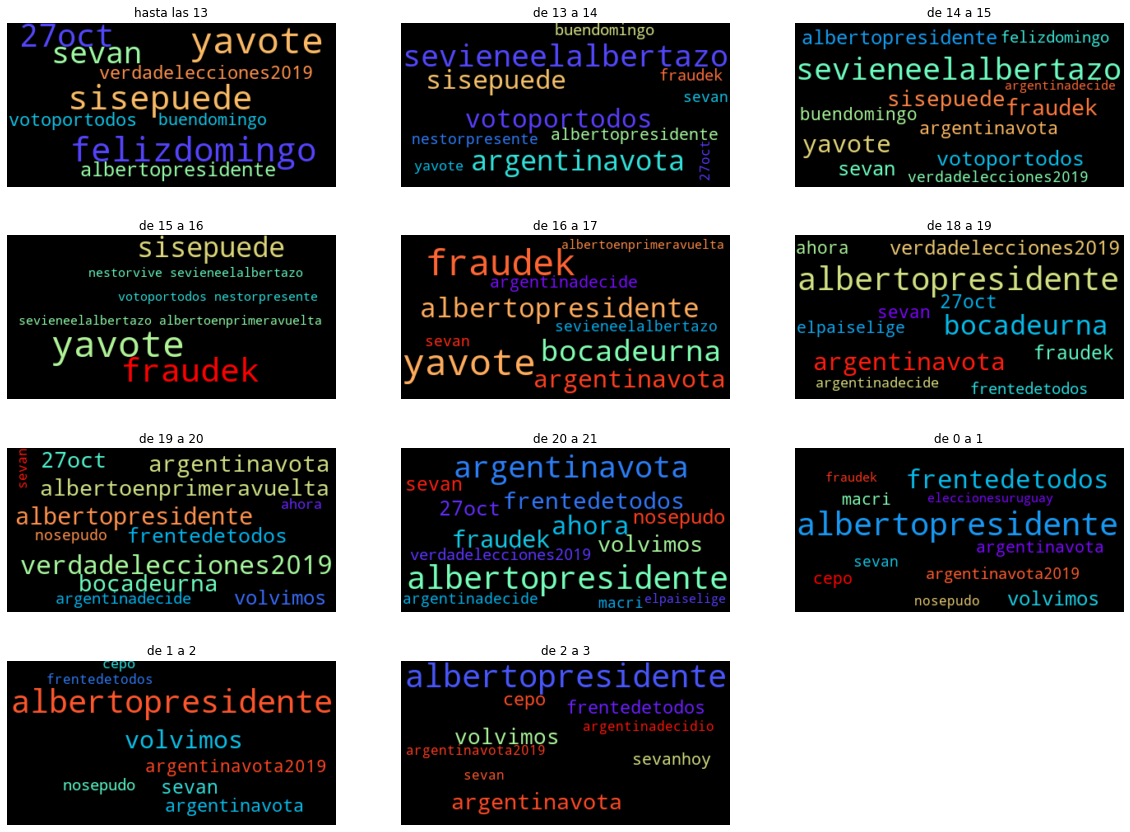

In [54]:
#Generamos WordsCloud para evaluar los hashtags
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

from wordcloud import WordCloud

#Decidimos quitar estos hashtags por generar ruido no deseado
stop_words = ['argentina', 'eleccionesargentina', 'eleccionesargentina2019', 'elecciones2019',
              'eleccionescolombia', 'colombiadecide', 'colombia',
              'expoaéreoven2019']

wc_hr = WordCloud(stopwords = stop_words, background_color="black", colormap="rainbow", 
               max_font_size=45, min_font_size=15, random_state=42, max_words=500)
 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
 
#Creamos subplots para cada hr
for index, hr in enumerate(hash_hr.index):
    wc_hr.generate(hash_hr.hashtags_modif[hr])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc_hr, interpolation="bilinear")
    plt.axis("off")
    plt.title(hash_hr.hr_title[hr])
plt.show()

----------------------

In [185]:
#Importamos las StopWord para español
stopwords = nltk.corpus.stopwords.words('spanish')

#Agregamos algunas stopword mas que aportaban solo ruido
newStopWords = ['mas','bettina', 'romero', 'aos', 'tambien', 'chavistas', 'looken']
stopwords.extend(newStopWords)

In [186]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [110]:
#Realizamos la tokenizacion
tw['tokenized_sents'] = tw.apply(lambda row: nltk.word_tokenize(row['text_modif']), axis=1)

In [187]:
#Eliminamos las StopWords
tw['tokenized_sents'] = tw['tokenized_sents'].apply(lambda x: [item for item in x if item not in stopwords])

In [165]:
#Comparamos resultados
print('Texto Original: ', tw['text_modif'][34], '\n')
print('Texto Tokenizado: ', tw['tokenized_sents'][34])

Texto Original:  por mis pagos la matanza desde temprano difunden en redes irregularidades en la votacion falta de fiscales amenaza de bomba en colegios aun ningun medio se hizo eco de esto  

Texto Tokenizado:  ['pagos', 'matanza', 'temprano', 'difunden', 'redes', 'irregularidades', 'votacion', 'falta', 'fiscales', 'amenaza', 'bomba', 'colegios', 'aun', 'ningun', 'medio', 'hizo', 'eco']


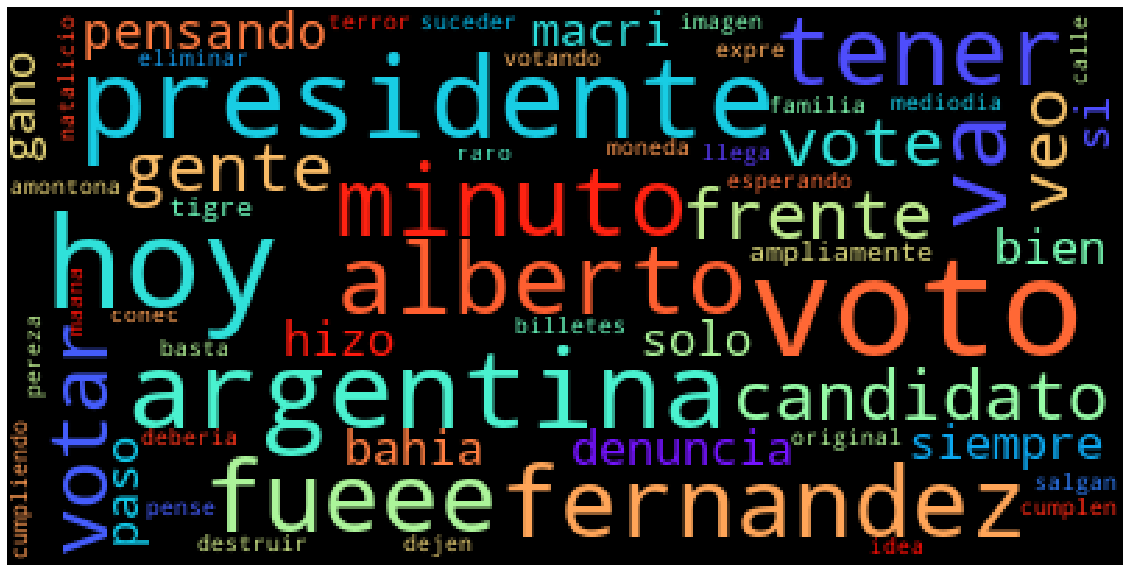

In [188]:
#Generamos el WordCloud
wc_gral = WordCloud( background_color="black", colormap="rainbow", 
               max_font_size=50, min_font_size=8, max_words=1000).generate(str(tw.tokenized_sents))

fig = plt.figure(1, figsize=(20, 20)) 
plt.axis('off') 
plt.imshow(wc_gral) 
plt.show()

Tambien aplicamos lo aprendido en la clase de embeddings para observar el parecido entre diferentes palabras

In [189]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
from collections import defaultdict
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
from gensim import corpora, models, similarities, matutils
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.matutils import cossim
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import random
import sys
from tqdm import tqdm
from sklearn import manifold

In [190]:
#Importamos data
tw = pd.read_csv('tweets_clean4.2 - para prediccion.csv')

In [191]:
#Eliminamos los emojis
tw['text_modif'] = tw['text_modif'].apply(deEmojify)

In [192]:
#Nos quedamos solo con lo necesario
tw = tw['text_modif']

In [193]:
#Generamos un txt con la columna text_modif
tw.to_csv('corpus.txt', header=False, index=None, sep=' ', mode='a')

#Hacemos ciertos cambios en el archivo obtenido con una herramienta externa (puntos, comillas, etc).

Comenzamos con los embeddings

In [194]:
#Importamos el corpus
corpus = open("corpus.txt", "r", encoding='utf-8').read() # read corpus
corpus[:1000] # mostrar primeras 1000 palabras

'\ufeffhoy es un dia especial y vale la pena correrme un poco de mi linea social y expresarme sobre mis ideales disculpen las molestiashoy mas que nunca mas presente que nunca flaco querido.\ntodas las boletas de macri rotas escuela 57 de el palomar felicitaciones lacra.\nmas denuncias mas escuelas clausuradas menos votos kirchneristas comparados con los anti-k q votan bien  saben que pierden macri la matanza voten bien.\nmientras nos preparamos para el festejo nos animamos a reflexionar e ir un poco mas alla de las elecciones nuestra mirada de y el mundo desde una mirada popular y feminista.\nque nuestros hermanos tengan sabiduria y hagan la mejor eleccion para su nacion.\nvoto el candidato a vicepresidente por el frente despertar en la escuela primaria comun n1 juan jose castelli en recoleta.\nespero que sea cual sea la decision de la mayoria el pais pueda salir adelante y poder convertirnos en una gran nacion lo que importa es que el pueblo no se quede dormido ante ningun gobierno c

In [195]:
#Armamos una lista de oraciones
sent_tokenize(corpus) 

['\ufeffhoy es un dia especial y vale la pena correrme un poco de mi linea social y expresarme sobre mis ideales disculpen las molestiashoy mas que nunca mas presente que nunca flaco querido.',
 'todas las boletas de macri rotas escuela 57 de el palomar felicitaciones lacra.',
 'mas denuncias mas escuelas clausuradas menos votos kirchneristas comparados con los anti-k q votan bien  saben que pierden macri la matanza voten bien.',
 'mientras nos preparamos para el festejo nos animamos a reflexionar e ir un poco mas alla de las elecciones nuestra mirada de y el mundo desde una mirada popular y feminista.',
 'que nuestros hermanos tengan sabiduria y hagan la mejor eleccion para su nacion.',
 'voto el candidato a vicepresidente por el frente despertar en la escuela primaria comun n1 juan jose castelli en recoleta.',
 'espero que sea cual sea la decision de la mayoria el pais pueda salir adelante y poder convertirnos en una gran nacion lo que importa es que el pueblo no se quede dormido ant

In [196]:
#Reemplazamos los signos $
corpus = corpus.replace("$"," signopesos ") 
#Reemplazamos numeros con " num " y  pasamos a minuscula 
reg_num = re.compile(r"\d+[.,]?\d*") # Regular expression para buscar numeros
corpus = reg_num.sub(" NUM ",corpus).lower()  
corpus = sent_tokenize(corpus)
#Eliminamos los tokens no alphabeticos 
trainset = []
for sent in tqdm(corpus):
    tokens = []#corpus
    for token in word_tokenize(sent):
        if token.isalpha():
            tokens.append(token)
    trainset.append(tokens)

100%|██████████████████████████████████| 11155/11155 [00:02<00:00, 3884.90it/s]


In [213]:
trainset[:1]

[['es',
  'un',
  'dia',
  'especial',
  'y',
  'vale',
  'la',
  'pena',
  'correrme',
  'un',
  'poco',
  'de',
  'mi',
  'linea',
  'social',
  'y',
  'expresarme',
  'sobre',
  'mis',
  'ideales',
  'disculpen',
  'las',
  'molestiashoy',
  'mas',
  'que',
  'nunca',
  'mas',
  'presente',
  'que',
  'nunca',
  'flaco',
  'querido']]

In [198]:
print ("el corpus tiene",len(trainset), "oraciones y",sum([len(x) for x in trainset]),"palabras"   )

el corpus tiene 11155 oraciones y 463252 palabras


In [199]:
#Filtramos oraciones cortas
trainset2 = [] 
for sent in trainset:
    if len(sent)>3:
        trainset2.append(sent)

print( "el corpus tiene",len(trainset2), "oraciones y",sum([len(x) for x in trainset2]),"palabras"  )

el corpus tiene 10815 oraciones y 462421 palabras


In [200]:
#Aplicamos el modelo

# "window" es el tamaño de la ventana. windows = 10, usa 10 palabras a la izquierda y 10 palabras a la derecha
# "n_dim" es la dimension (i.e. el largo) de los vectores de word2vec
# "workers" es el numero de cores que usa en paralelo. Para aprobechar eso es necesario tener instalado Cython)
# "sample": word2vec filtra palabras que aparecen una fraccion mayor que "sample"
# "min_count": Word2vec filtra palabras con menos apariciones que  "min_count"
# "sg": para correr el Skipgram model (sg = 1), para correr el CBOW (sg = 0)
# para mas detalle ver: https://radimrehurek.com/gensim/models/word2vec.html
n_dim = 20
w2v_model = Word2Vec(trainset2, workers=4,size=n_dim, min_count = 10, window = 5, sample = 1e-3,negative=10,sg=0)

In [203]:
#Representacion de una palabra
w2v_model["elecciones"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 1.2842584 ,  1.361132  ,  0.3599166 , -0.735647  , -0.85321605,
        0.47280988, -1.0223007 , -0.57853526,  0.43001676,  0.46804202,
       -1.211976  , -1.8477125 ,  1.0692668 ,  2.5032816 ,  1.1906842 ,
        1.0205909 ,  1.6716963 ,  0.09017594, -2.665406  ,  0.5815948 ],
      dtype=float32)

In [210]:
w2v_model.most_similar(positive=["presidente"], negative=[], topn=15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('electo', 0.9357467889785767),
 ('nuevo', 0.9069963693618774),
 ('kirchner', 0.8874269723892212),
 ('cristina', 0.8693975806236267),
 ('nestor', 0.8471465110778809),
 ('asesinos', 0.8393135070800781),
 ('dirigente', 0.8336421251296997),
 ('gobernador', 0.8255980610847473),
 ('kicillof', 0.8238941431045532),
 ('ensaandose', 0.8233864903450012),
 ('fernandez', 0.8213002681732178),
 ('sera', 0.8158576488494873),
 ('triunfo', 0.8157680034637451),
 ('habla', 0.8137471079826355),
 ('vicepresidenta', 0.8136169910430908)]

In [209]:
w2v_model.most_similar(positive=["candidato"], negative=[], topn=15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('triunfo', 0.9653724431991577),
 ('bunker', 0.9558805227279663),
 ('primer', 0.9530535936355591),
 ('gobernador', 0.9344045519828796),
 ('habla', 0.9326985478401184),
 ('frente', 0.9211394786834717),
 ('dirigente', 0.9176932573318481),
 ('alcalde', 0.9145272970199585),
 ('ejerce', 0.9095914959907532),
 ('enviamos', 0.9089388251304626),
 ('obtuvo', 0.9029392004013062),
 ('nacional', 0.8969957828521729),
 ('desde', 0.8931313753128052),
 ('escrutado', 0.8898634910583496),
 ('tras', 0.8873350620269775)]

In [212]:
w2v_model.most_similar(positive=["voto"], negative=[], topn=15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('derecho', 0.949577271938324),
 ('ejerce', 0.8757750988006592),
 ('peronismo', 0.8691915273666382),
 ('ejercieron', 0.8667075037956238),
 ('ejercer', 0.8636104464530945),
 ('gobierno', 0.8616024255752563),
 ('padron', 0.8512294292449951),
 ('oscuro', 0.8367680311203003),
 ('fue', 0.8345959186553955),
 ('al', 0.8331524133682251),
 ('emitio', 0.8315954208374023),
 ('dolar', 0.8276762962341309),
 ('su', 0.8276408314704895),
 ('pueblo', 0.8271334767341614),
 ('ejercio', 0.8265783786773682)]

In [207]:
w2v_model.most_similar(positive=["fernandez"], negative=[], topn=15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('kirchner', 0.9295471906661987),
 ('cristina', 0.9149974584579468),
 ('mauricio', 0.8969132304191589),
 ('macri', 0.8749434351921082),
 ('nestor', 0.8354411125183105),
 ('gana', 0.8313949704170227),
 ('presidente', 0.8213001489639282),
 ('habla', 0.8187856674194336),
 ('enviamos', 0.7966543436050415),
 ('ensaandose', 0.774553656578064),
 ('electo', 0.7733535170555115),
 ('dirigente', 0.7729989290237427),
 ('candidato', 0.7648614645004272),
 ('vuelta', 0.7590588927268982),
 ('gano', 0.7586775422096252)]

In [208]:
w2v_model.most_similar(positive=["macri"], negative=[], topn=15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('cristina', 0.9396830201148987),
 ('mauricio', 0.9374969005584717),
 ('kirchner', 0.9320117235183716),
 ('alberto', 0.9158861041069031),
 ('gana', 0.8971569538116455),
 ('nestor', 0.8755636215209961),
 ('fernandez', 0.8749433755874634),
 ('ensaandose', 0.8565564155578613),
 ('habla', 0.8283599019050598),
 ('gano', 0.8222630023956299),
 ('enviamos', 0.8217859268188477),
 ('gritan', 0.8109887838363647),
 ('invito', 0.8086851835250854),
 ('presidente', 0.805402398109436),
 ('desayunar', 0.8049184679985046)]

In [211]:
pal1 = 'fernandez'
pal2 = 'macri'
print(pal1,'-',pal2,'similarity:',w2v_model.wv.n_similarity([pal1], [pal2]))

fernandez - macri similarity: 0.87494344
